## Buy-hold Stratergy

In [1]:
import pandas as pd
from pandas import DatetimeIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
%matplotlib inline

import numpy as np
import scipy.stats as ss
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 

from datetime import datetime
import yfinance as yf


Import Data

In [2]:
# bitcoin_df = pd.read_excel("./CRYPTOCURRENCY/BITCOIN.xlsx")
# litecoin_df = pd.read_excel("./CRYPTOCURRENCY/LITECOIN.xlsx")
# etherium_df = pd.read_excel("./CRYPTOCURRENCY/ETHEREUM.xlsx")

In [3]:
# #create date as the dataframe index
# bitcoin_df.index = DatetimeIndex(bitcoin_df['Date'])
# etherium_df.index = DatetimeIndex(etherium_df['Date'])
# litecoin_df.index = DatetimeIndex(litecoin_df['Date'])

Reset index as Date

In [4]:
# #drop original date column
# bitcoin_df.drop("Date",axis =1,inplace=True)
# etherium_df.drop("Date",axis =1,inplace=True)
# litecoin_df.drop("Date",axis =1,inplace=True)

In [15]:
#Load Data
start_date = datetime(2019,1,1)
end_date = datetime(2021,1,1)
NVDA = yf.download('NVDA',start_date ,end_date)
NVDA.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.831322,50875200
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.787329,70555200
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.823872,58562000
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.614525,70916000
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.727890,78601600


In [16]:
#Load Data
start_date = datetime(2019,1,1)
end_date = datetime(2021,1,1)
AMD = yf.download('AMD',start_date ,end_date)
AMD.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,18.010000,19.000000,17.980000,18.830000,18.830000,87148700
2019-01-03,18.420000,18.680000,16.940001,17.049999,17.049999,117277600
2019-01-04,17.549999,19.070000,17.430000,19.000000,19.000000,111878600
2019-01-07,19.440001,20.680000,19.000000,20.570000,20.570000,107157000
2019-01-08,21.190001,21.200001,19.680000,20.750000,20.750000,121271000


In [17]:
#Load Data
start_date = datetime(2019,1,1)
end_date = datetime(2021,1,1)
INTC = yf.download('INTC',start_date ,end_date)
INTC.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,45.959999,47.470001,45.770000,47.080002,43.356537,18774600
2019-01-03,46.150002,46.279999,44.389999,44.490002,40.971375,32267300
2019-01-04,45.840000,47.570000,45.540001,47.220001,43.485462,35447300
2019-01-07,47.099998,48.000000,46.750000,47.439999,43.688061,22736800
2019-01-08,47.799999,48.029999,46.779999,47.740002,43.964336,22749200


### Calculate HLC for each currency

In [19]:
NVDA['HLC'] = (NVDA.High + NVDA.Low + 2*NVDA.Close)/4
AMD['HLC'] = (AMD.High+ AMD.Low+ 2*AMD["Close"])/4
INTC['HLC'] = (INTC.High + INTC.Low + 2*INTC["Close"])/4

In [20]:
data = INTC.join(NVDA, lsuffix='_INTC', rsuffix='_NVDA').join(AMD,rsuffix="_AMD")

In [21]:
data


,Open_INTC,High_INTC,Low_INTC,Close_INTC,Adj Close_INTC,Volume_INTC,HLC_INTC,Open_NVDA,High_NVDA,Low_NVDA,...,Adj Close_NVDA,Volume_NVDA,HLC_NVDA,Open,High,Low,Close,Adj Close,Volume,HLC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,45.959999,47.470001,45.770000,47.080002,43.356537,18774600,46.850001,32.660000,34.619999,32.512501,...,33.831322,50875200,33.810625,18.010000,19.000000,17.980000,18.830000,18.830000,87148700,18.660000
2019-01-03,46.150002,46.279999,44.389999,44.490002,40.971375,32267300,44.912500,33.447498,33.790001,31.922501,...,31.787329,70555200,32.426875,18.420000,18.680000,16.940001,17.049999,17.049999,117277600,17.430000
2019-01-04,45.840000,47.570000,45.540001,47.220001,43.485462,35447300,46.887501,32.735001,34.432499,32.424999,...,33.823872,58562000,33.738125,17.549999,19.070000,17.430000,19.000000,19.000000,111878600,18.625000
2019-01-07,47.099998,48.000000,46.750000,47.439999,43.688061,22736800,47.407499,34.625000,36.222500,34.107498,...,35.614525,70916000,35.507499,19.440001,20.680000,19.000000,20.570000,20.570000,107157000,20.205000
2019-01-08,47.799999,48.029999,46.779999,47.740002,43.964336,22749200,47.572500,36.672501,36.695000,34.224998,...,34.727890,78601600,35.208750,21.190001,21.200001,19.680000,20.750000,20.750000,121271000,20.595000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,46.599998,47.090000,46.340000,47.070000,45.533478,11865600,46.892500,130.372498,131.324997,129.387497,...,129.802002,9788400,130.146873,91.800003,92.510002,91.309998,91.809998,91.809998,16705900,91.859999
2020-12-28,47.189999,47.639999,46.860001,47.070000,45.533478,21269200,47.160000,130.625000,130.625000,127.632500,...,128.865479,21256400,129.064375,92.930000,93.139999,90.820000,91.599998,91.599998,30627300,91.789999
2020-12-29,47.220001,50.669998,46.490002,49.389999,47.777744,84531400,48.985000,129.250000,130.725006,128.422501,...,129.297516,17037200,129.503124,91.660004,92.459999,89.430000,90.620003,90.620003,31748200,90.782501


In [22]:
profile_data = pd.DataFrame(data = [data.HLC_NVDA,data.HLC_INTC,data.HLC])
profile_data = profile_data.T

In [23]:
profile_data

,HLC_NVDA,HLC_INTC,HLC
Date,,,
2019-01-02,33.810625,46.850001,18.660000
2019-01-03,32.426875,44.912500,17.430000
2019-01-04,33.738125,46.887501,18.625000
2019-01-07,35.507499,47.407499,20.205000
2019-01-08,35.208750,47.572500,20.595000
...,...,...,...
2020-12-24,130.146873,46.892500,91.859999
2020-12-28,129.064375,47.160000,91.789999
2020-12-29,129.503124,48.985000,90.782501


## Combine all cryptocurrencies as a single portfolio

In [24]:
profile_data.rename(columns={"HLC_NVDA":"NVDA","HLC_INTC":"INTC","HLC":"AMD"},inplace=True)

#### Relative returns for the profile per day

In [25]:
# Relative returns
returns = profile_data.pct_change(1)
returns.tail()

,NVDA,INTC,AMD
Date,,,
2020-12-24,-0.004584,0.007141,-0.000680
2020-12-28,-0.008318,0.005705,-0.000762
2020-12-29,0.003399,0.038698,-0.010976
2020-12-30,0.011597,-0.003521,0.012365
2020-12-31,-0.004313,0.016901,-0.002802


#### Log returns for the profile per day

In [26]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(profile_data).diff()
log_returns.tail()

,NVDA,INTC,AMD
Date,,,
2020-12-24,-0.004595,0.007116,-0.000680
2020-12-28,-0.008352,0.005688,-0.000762
2020-12-29,0.003394,0.037968,-0.011037
2020-12-30,0.011530,-0.003528,0.012289
2020-12-31,-0.004322,0.016760,-0.002806


### Plotting Return for the entire period

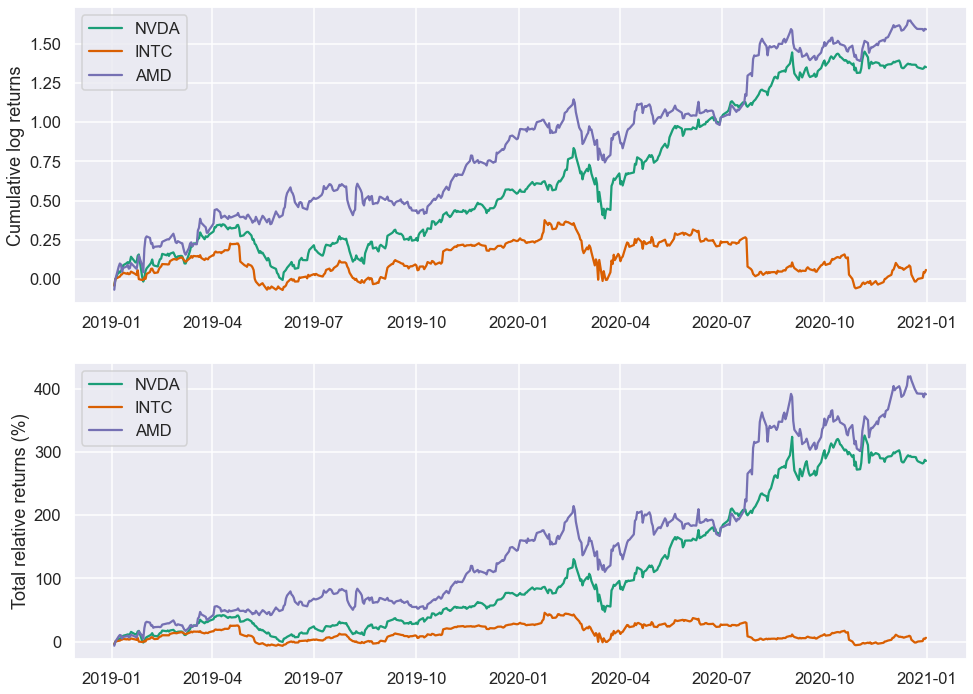

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

### We distribute our amount eqally into 3 assests. Each one getting a ~ 33% of the share 

In [28]:
weights_matrix = pd.DataFrame(1 / 3, index=profile_data.index, columns=profile_data.columns)
weights_matrix.tail()

,NVDA,INTC,AMD
Date,,,
2020-12-24,0.333333,0.333333,0.333333
2020-12-28,0.333333,0.333333,0.333333
2020-12-29,0.333333,0.333333,0.333333
2020-12-30,0.333333,0.333333,0.333333
2020-12-31,0.333333,0.333333,0.333333


In [29]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())

### Calculationg log returns for portfolio

In [30]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

Date
2020-12-24    0.000614
2020-12-28   -0.001142
2020-12-29    0.010108
2020-12-30    0.006764
2020-12-31    0.003211
dtype: float64

### Calculate total relative returns for the portfolio

In [31]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

### Total Log Returns vs Relative Returns for the entire considered period

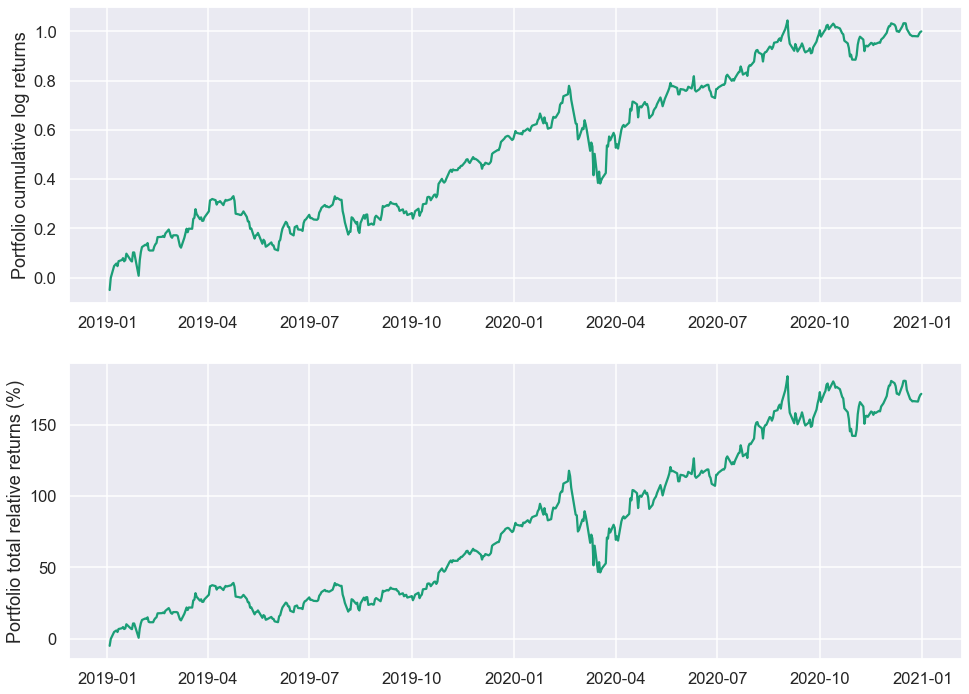

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [33]:
# Calculating the time-related parameters of the simulation
days_per_year = 365
total_days_in_simulation = profile_data.shape[0]
number_of_years = total_days_in_simulation / days_per_year
# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is:' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is:171.78%
Average yearly return is: 105.99%
